# Monte Carlo Comparisons 
This is for compairing my code to Monte Carlo.

In [1]:
%pylab ipympl
import pickle
import imshow_slider as ims
from topas2numpy import BinnedResult
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


## Testing Dose One
This is a 120 keV monoenergetic pencil beam in an ellipse shape moving from positive to negative z. The medium is a 5cm x 5cm x 5cm block with 50 voxels in each axis.

In [2]:
my_dose_array_corrected = pickle.load(open('dose_doublemu_3.pickle','rb'))
my_dose_array = pickle.load(open('dose_12.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [3]:
conversion = 1.602e-10

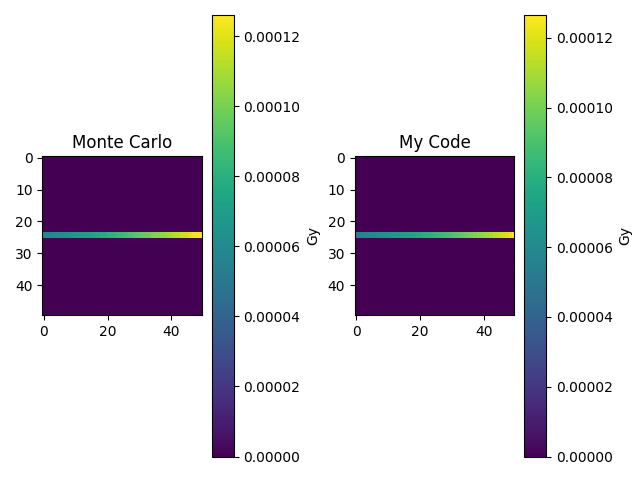

In [4]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


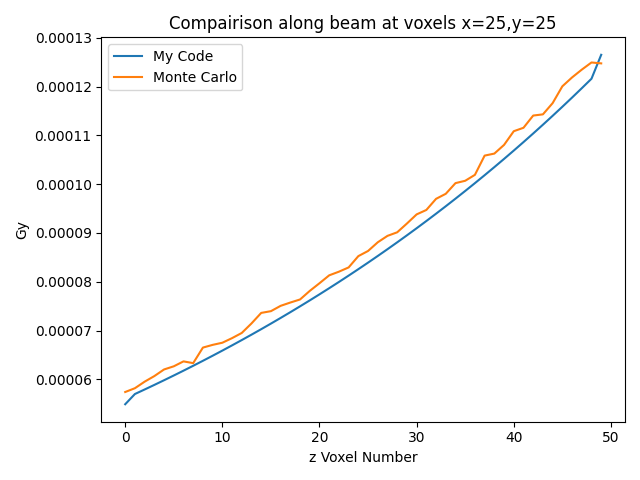

In [11]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

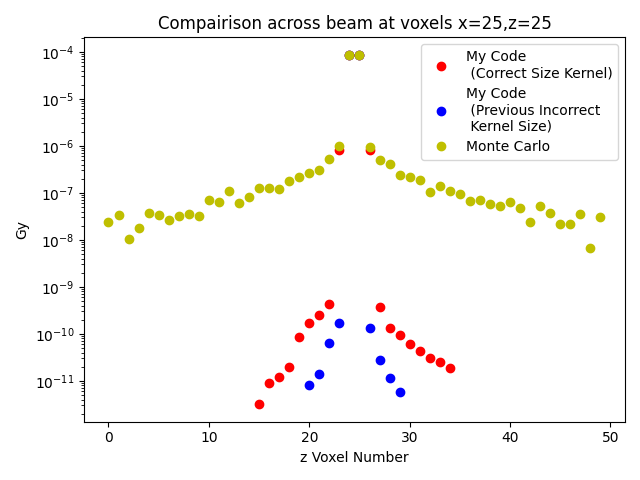

In [12]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

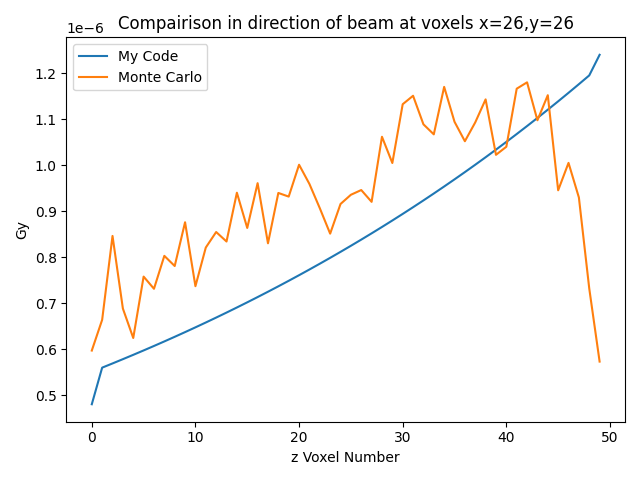

In [17]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

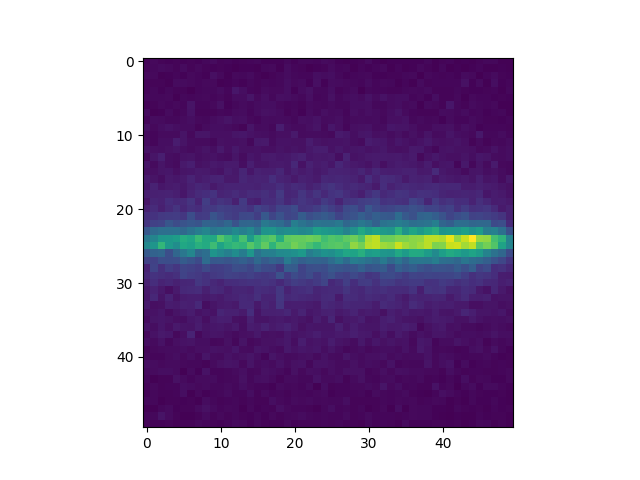

In [19]:
close(6);figure(6)
imshow(mc_dose_array[26])

In [9]:
my_fluence_dict = pickle.load(open('terma_test.pickle','rb'))
mc_fluence_array_full = BinnedResult('../Topas/EnergyFluence.csv')
mc_fluence_array = mc_fluence_array_full.data['Sum']

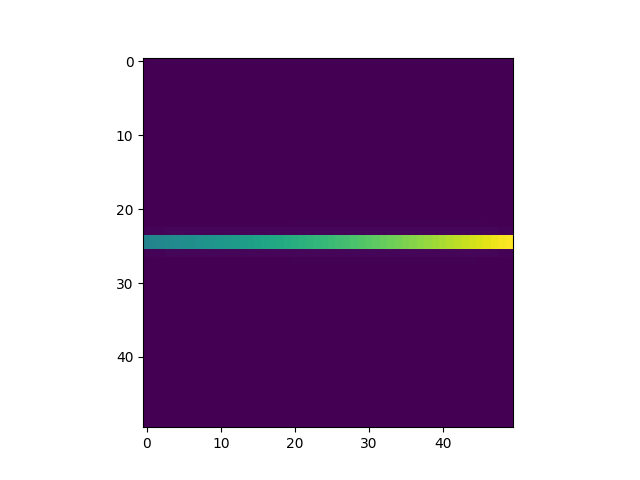

In [10]:
ifig=4;close(ifig);figure(ifig)
imshow(mc_fluence_array[25])

## Testing Dose Two

In [2]:
my_dose_array = pickle.load(open('dosetest2_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose2.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [3]:
conversion = 1.602e-10

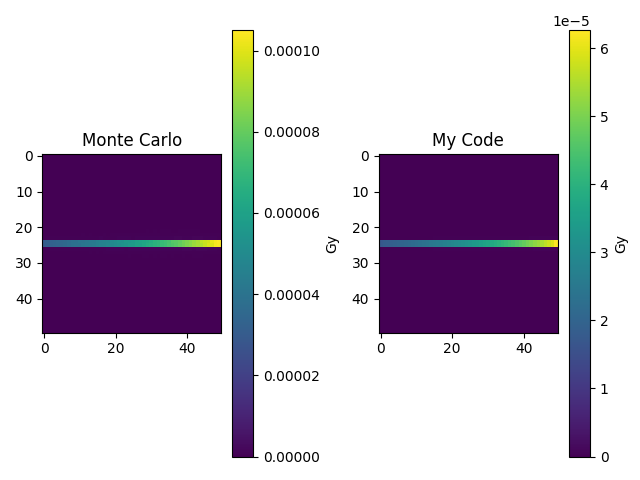

In [4]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()

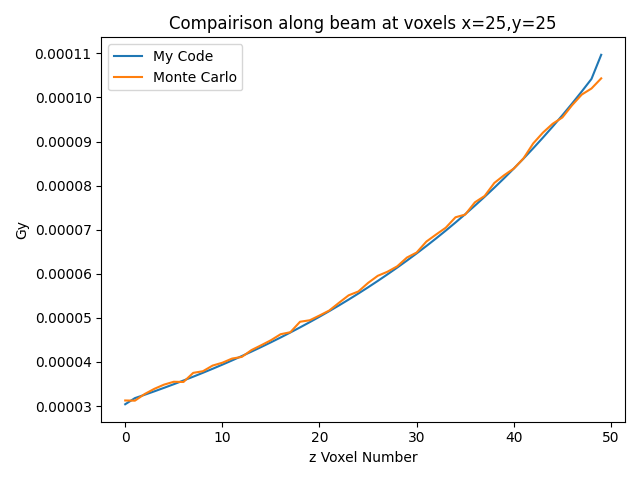

In [10]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion*1.75,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

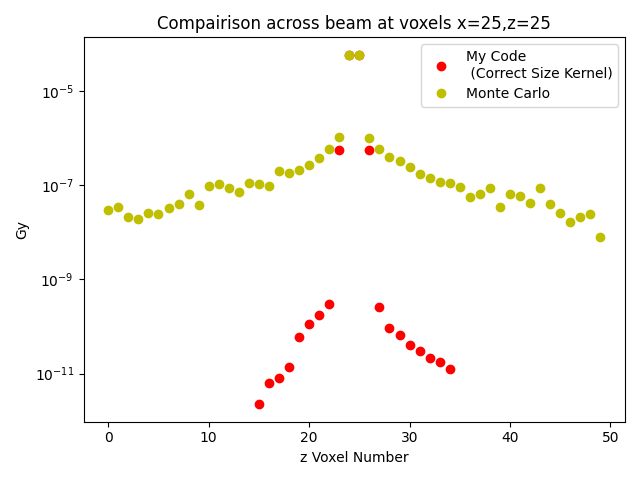

In [11]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion*1.75,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion*1.75,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

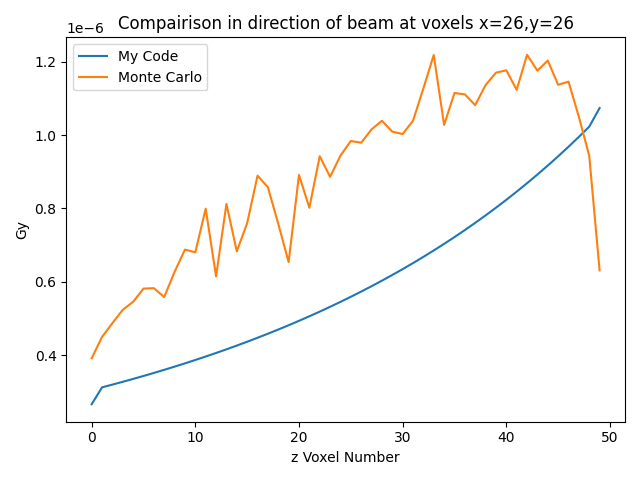

In [12]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion*1.75,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()